In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [2]:
data = pd.read_csv('C:/Users/beind/twitter.csv',header=None,encoding='latin-1')

In [3]:
data.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
data.rename(columns={0:'Target',1:'ID', 2:'Date',3:'Flag',4:'User',5:'Tweet_Content'},inplace =True)

data.head()

,Target,ID,Date,Flag,User,Tweet_Content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
len(data)

1600000

In [6]:
data.isnull()

,Target,ID,Date,Flag,User,Tweet_Content
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1599995,False,False,False,False,False,False
1599996,False,False,False,False,False,False
1599997,False,False,False,False,False,False
1599998,False,False,False,False,False,False


In [7]:
np.sum(data.isnull())

Target           0
ID               0
Date             0
Flag             0
User             0
Tweet_Content    0
dtype: int64

In [8]:
data['Target'].unique()

array([0, 4], dtype=int64)

In [9]:
data['Target'].nunique()

2

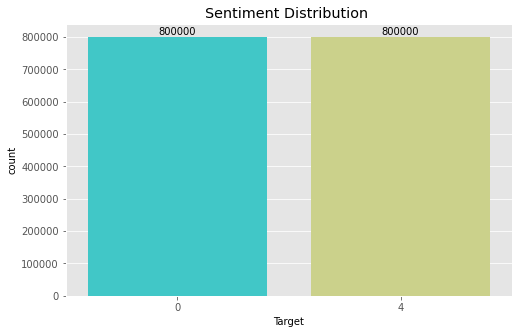

In [10]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='Target',data=data, palette='rainbow')
plt.title("Sentiment Distribution ")

for container in ax.containers:
    ax.bar_label(container)

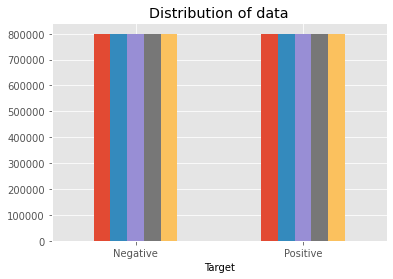

In [11]:
# Plotting the distribution for dataset.
axis = data.groupby('Target').count().plot(kind='bar', title='Distribution of data',legend=False)
axis.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(data['Tweet_Content']), list(data['Target'])

In [12]:
data.columns

Index(['Target', 'ID', 'Date', 'Flag', 'User', 'Tweet_Content'], dtype='object')

In [13]:
data.shape

(1600000, 6)

In [14]:
sample = data[['Target','Tweet_Content']]

In [15]:
sample['Target'].unique()

array([0, 4], dtype=int64)

In [16]:
positive= sample[sample['Target']==1]
negative= sample[sample['Target']==0]

In [17]:
positive = positive.iloc[:int(20000)]
negative = positive.iloc[:int(20000)]

In [18]:
new_dataset = pd.concat([positive,negative])

In [19]:
new_dataset['Tweet_Content']=new_dataset['Tweet_Content'].str.lower()

In [20]:
new_dataset['Tweet_Content'].head()

Series([], Name: Tweet_Content, dtype: object)

In [21]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [22]:
STOPWORDS = set(stopwordlist)#turn it into a set
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
new_dataset['Tweet_Content'] = new_dataset['Tweet_Content'].apply(lambda text: cleaning_stopwords(text))
new_dataset['Tweet_Content'].head()

Series([], Name: Tweet_Content, dtype: object)

In [23]:
import string
eng_punctuations = string.punctuation
punctuations_list = eng_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
new_dataset['Tweet_Content'] = new_dataset['Tweet_Content'].apply(lambda text: cleaning_punctuations(text))
new_dataset['Tweet_Content'].head()

Series([], Name: Tweet_Content, dtype: object)

In [24]:
import re

In [25]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
new_dataset['Tweet_Content'] = new_dataset['Tweet_Content'].apply(lambda x: cleaning_repeating_char(x))
new_dataset['Tweet_Content'].tail()

Series([], Name: Tweet_Content, dtype: object)

In [26]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
new_dataset['Tweet_Content'] = new_dataset['Tweet_Content'].apply(lambda x: cleaning_URLs(x))
new_dataset['Tweet_Content'].head()

Series([], Name: Tweet_Content, dtype: object)

In [27]:
def remove_numbers(data):
    return re.sub('[0-9]+', '', data)
new_dataset['Tweet_Content'] = new_dataset['Tweet_Content'].apply(lambda x: remove_numbers(x))
new_dataset['Tweet_Content'].head()

Series([], Name: Tweet_Content, dtype: object)

In [28]:
from nltk.tokenize import RegexpTokenizer
def tokenize_tweet(tweet):
    return nltk.word_tokenize(tweet)
new_dataset['Tweet_Content_Token'] = new_dataset['Tweet_Content'].apply(tokenize_tweet)
new_dataset.head(10)

,Target,Tweet_Content,Tweet_Content_Token


In [29]:

from nltk.tokenize import TweetTokenizer
def tokenize(text):
    tokenizer = TweetTokenizer(reduce_len=True)
    return tokenizer.tokenize(text)

new_dataset['Token'] = [tokenize(sentence) for sentence in new_dataset['Tweet_Content']]
new_dataset.head()

,Target,Tweet_Content,Tweet_Content_Token,Token


In [30]:
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
new_dataset['Tweet_Content_Token'] = new_dataset['Tweet_Content_Token'].apply(lambda x: stemming_on_text(x))
new_dataset['Tweet_Content_Token'].head()

Series([], Name: Tweet_Content_Token, dtype: object)

In [31]:
lam = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
new_dataset['Tweet_Content_Token'] = new_dataset['Tweet_Content_Token'].apply(lambda x: lemmatizer_on_text(x))
new_dataset['Tweet_Content_Token'].head()

Series([], Name: Tweet_Content_Token, dtype: object)

In [32]:
X=data.Tweet_Content
y=data.Target

In [33]:
 #pip install wordcloud

In [34]:
#from wordcloud import WordCloud

In [35]:
#negative = new_dataset['Tweet_Content'][:]
#plt.figure(figsize = (20,20))
#wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               #collocations=False).generate(" ".join(negative))
#plt.imshow(wc)
#positive = data['text'][:800000]
#wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              #collocations=False).generate(" ".join(positive))
#plt.figure(figsize = (20,20))
#plt.imshow(wc)

In [36]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [38]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('Feature_words count: ', len(vectoriser.get_feature_names()))

C:\Users\beind\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Feature_words count:  500000


In [39]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [41]:
def model_Evaluate(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
# Compute and plot the Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
categories = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

NameError: name 'y_pred' is not defined

In [ ]:
#Bernoulli Model

BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_predict1 = BNBmodel.predict(X_test)

In [ ]:
#SVC Model
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

In [ ]:
#Logistic Regression
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)